In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

import keras
from keras.preprocessing import image
from keras.applications.xception import (
    Xception, preprocess_input, decode_predictions)

Using TensorFlow backend.


In [2]:
# Load the Xception model
# https://keras.io/applications/#xception
model = Xception(
    include_top=True,
    weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# Default Image Size for Xception
image_size = (299, 299)

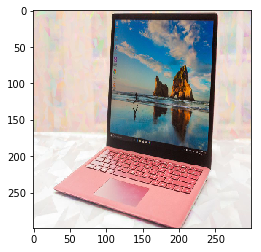

In [4]:
# Load the image and resize to the input dimensions that Xception
# was trained with
image_path = os.path.join("..", "Images", "laptop.jpg")
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [5]:
# Preprocess image for model prediction
# This step handles scaling and normalization for Xception
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Predicted: [('n03832673', 'notebook', 0.7781511), ('n03642806', 'laptop', 0.12691598), ('n03584254', 'iPod', 0.016244896)]


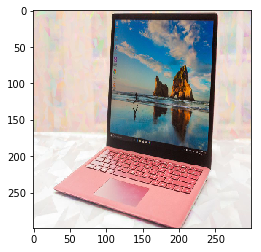

In [6]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])
plt.imshow(img)

In [7]:
# Refactor above steps into reusable function
def predict(image_path):
    """Use Xception to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=3)[0])

Predicted: [('n02708093', 'analog_clock', 0.90891093), ('n04328186', 'stopwatch', 0.020929027), ('n04548280', 'wall_clock', 0.009273358)]


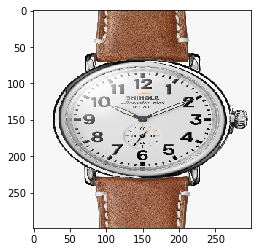

In [8]:
image_path = os.path.join("..", "Images", "wristwatch.jpg")
predict(image_path)

In [9]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/JF/Documents/WASHUDATAANALYTICS/FINALPROJECT/MyProject-87540abb832b.json"

In [10]:
from google.cloud import translate

In [11]:
translate_client = translate.Client()

In [12]:
text = u'Hello, world!'
target = 'ru'

In [13]:
translation = translate_client.translate(
    text,
    target_language=target)

In [14]:
print(u'Text: {}'.format(text))

Text: Hello, world!


In [15]:
print(u'Translation: {}'.format(translation['translatedText']))

Translation: Привет, мир!
